![title](img/nobel.png)

# Nobel Prize Data Analysis

## Introduction

The Nobel prizes are the creation of Alfred B. Nobel, a Swedish inventor, industrialist, and dynamite magnate. When he passed away in 1896, he left behind what was then one of the world's largest private fortunes. In his last will and testament he declared that his fortune be used to annually reward the persons “who, during the preceding year, shall have conferred the greatest benefit to mankind” in the fields of physics, chemistry, physiology or medicine, literature, and peace. The economics prize was added to the original awards in 1969 and is the only Nobel prize that was not stipulated in the will.

The first Nobel prizes were awarded in 1901. The first Nobel prize in economic sciences was awarded in 1969. There are some years when Nobel prizes have not been awarded, most of them during World War I (1914-1918) and II (1939-1945). On some occasions a Nobel prize has also been "reserved" due to a lack of suitable winners. Most recently, in 2018, no Nobel prize for literature was awarded because of a scandal in the academy. Instead, two laureates were revealed in 2019.

## Analysis

The paradox of the Nobel prize is that while it has become the world's most famous award for celebrating positive contributions to humanity, the prize itself seems incapable of keeping up with positive change.

Throughout the history of the Nobel prize there have been a fair amount of controversies and blunders, but the real struggle of the Nobel prize lies in overcoming the lack of diversity. Women are notoriously underrepresented among Nobel laureates. The same can be argued about people outside of Europe and North America. The diversity problem is even worse when it comes to race. It can even be argued that the trend of Nobel laureates winning prizes later in life, for research and work done many decades earlier, demonstrates a difficulty of keeping up to date. The prize seems to be stuck in Alfred Nobel's day.

Both the Nobel Committee and The Royal Swedish Academy of Sciences have acknowledged that Nobel prizes are biased in favour of old, white men and have introduced changes to nomination procedures to diversify the pool of potential winners (nomination is a prerequisite for receiving the Nobel Prize).

Bearing this in mind, have there actually been any significant shifts or changes over the recent years? Is it too early to tell? Let's find out!

Importing the required libraries.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Data

The source of this project's data is [the Nobel Foundation's detailed dataset](https://nobelprize.readme.io/docs/laureate) from 1901 to 2020.

In [2]:
nobel_data = pd.read_csv('data/laureate.csv')

Let's take a first look at the data.

In [3]:
nobel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 962 non-null    int64 
 1   firstname          962 non-null    object
 2   surname            932 non-null    object
 3   born               960 non-null    object
 4   died               962 non-null    object
 5   bornCountry        934 non-null    object
 6   bornCountryCode    934 non-null    object
 7   bornCity           932 non-null    object
 8   diedCountry        621 non-null    object
 9   diedCountryCode    621 non-null    object
 10  diedCity           615 non-null    object
 11  gender             962 non-null    object
 12  year               962 non-null    int64 
 13  category           962 non-null    object
 14  overallMotivation  20 non-null     object
 15  share              962 non-null    int64 
 16  motivation         962 non-null    object
 1

Some column names are too ambiguous and can be misleading, so we need to rename those columns.

In [4]:
# Change the name of columns name, city and country
nobel_data = nobel_data.rename(columns={"name": "affiliation", "city": "affiliationCity", "country": "affiliationCountry"})

Let's check if the dataset is up to date. Let's also see whether the dataset starts with the year the first prizes were awarded, 1901.

In [5]:
print("The last year in this dataset is:", nobel_data['year'].max())
print("The first year in this dataset is:", nobel_data['year'].min())

The last year in this dataset is: 2020
The first year in this dataset is: 1901


#### Missing data

A common occurrence in data sets is missing data. This can have a considerable effect on the conclusions that can be drawn from the data. Therefore, let's take a look at how much missing data is in our data set. 

In [6]:
# Get the amount of missing data
print('The amount of missing data in total:', (np.count_nonzero(nobel_data.isnull())))
print('Missing data in the column firstname:', (np.count_nonzero(nobel_data['firstname'].isnull())))
print('Missing data in the column surname:', (np.count_nonzero(nobel_data['surname'].isnull())))
print('Missing data in the column born:', (np.count_nonzero(nobel_data['born'].isnull())))
print('Missing data in the column died:', (np.count_nonzero(nobel_data['died'].isnull())))
print('Missing data in the column bornCountry:', (np.count_nonzero(nobel_data['bornCountry'].isnull())))
print('Missing data in the column bornCountryCode:', (np.count_nonzero(nobel_data['bornCountryCode'].isnull())))
print('Missing data in the column bornCity:', (np.count_nonzero(nobel_data['bornCity'].isnull())))
print('Missing data in the column diedCountry:', (np.count_nonzero(nobel_data['diedCountry'].isnull())))
print('Missing data in the column diedCountryCode:', (np.count_nonzero(nobel_data['diedCountryCode'].isnull())))
print('Missing data in the column diedCity:', (np.count_nonzero(nobel_data['diedCity'].isnull())))
print('Missing data in the column gender:', (np.count_nonzero(nobel_data['gender'].isnull())))
print('Missing data in the column year:', (np.count_nonzero(nobel_data['year'].isnull())))
print('Missing data in the column category:', (np.count_nonzero(nobel_data['category'].isnull())))
print('Missing data in the column overallMotivation:', (np.count_nonzero(nobel_data['overallMotivation'].isnull())))
print('Missing data in the column share:', (np.count_nonzero(nobel_data['share'].isnull())))
print('Missing data in the column motivation:', (np.count_nonzero(nobel_data['motivation'].isnull())))
print('Missing data in the column affiliation:', (np.count_nonzero(nobel_data['affiliation'].isnull())))
print('Missing data in the column affiliationCity:', (np.count_nonzero(nobel_data['affiliationCity'].isnull())))
print('Missing data in the column affiliationCountry:', (np.count_nonzero(nobel_data['affiliationCountry'].isnull())))

The amount of missing data in total: 2863
Missing data in the column firstname: 0
Missing data in the column surname: 30
Missing data in the column born: 2
Missing data in the column died: 0
Missing data in the column bornCountry: 28
Missing data in the column bornCountryCode: 28
Missing data in the column bornCity: 30
Missing data in the column diedCountry: 341
Missing data in the column diedCountryCode: 341
Missing data in the column diedCity: 347
Missing data in the column gender: 0
Missing data in the column year: 0
Missing data in the column category: 0
Missing data in the column overallMotivation: 942
Missing data in the column share: 0
Missing data in the column motivation: 0
Missing data in the column affiliation: 255
Missing data in the column affiliationCity: 260
Missing data in the column affiliationCountry: 259


When we look at what kind of data is missing, we can see that most of the missing data is in the columns that report where the laureate died (columns 'diedCountry', 'diedCountryCode' and 'diedCity') or what was the laureate's affiliation at the time of receiving the award (columns 'affiliation', 'affiliationCity' and 'affiliationCountry').

There are simple explanations for most of this. First of all, many Nobel prize laureates are still alive. 

In [7]:
print("The values of column 'died' when there is missing data in column 'diedCountry':\n\n" + str(nobel_data[nobel_data['diedCountry'].isnull()]['died'].value_counts()))

The values of column 'died' when there is missing data in column 'diedCountry':

0000-00-00    328
2017-03-29      1
2009-08-18      1
2018-03-06      1
2011-09-14      1
1921-07-13      1
2018-09-23      1
2010-03-21      1
2009-11-08      1
2013-12-08      1
2013-06-06      1
2011-09-30      1
2018-11-20      1
2017-02-08      1
Name: died, dtype: int64


Secondly, most winners of the literature prize and the peace prize were not working at a university or involved with an institution at the time of receiving the award. The opposite is true for most winners of the chemistry, physics, medicine, and economics prizes.

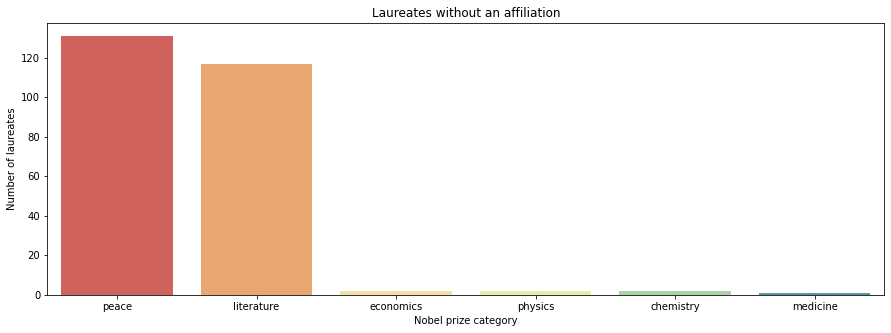

In [8]:
category_affiliation = nobel_data[['category', 'affiliation']]
missing = category_affiliation[category_affiliation.isna().any(axis=1)]
missing = missing['category'].value_counts().to_frame()

plt.figure(figsize=(15,5))
sns.barplot(x = missing.index, y = 'category', data = missing, palette='Spectral')
plt.xlabel('Nobel prize category')
plt.ylabel('Number of laureates')
plt.title('Laureates without an affiliation')
plt.show()

Some of the laureates are organisations and not individuals.

In [9]:
print("Unique values in the column 'gender':", nobel_data['gender'].unique().tolist())

Unique values in the column 'gender': ['male', 'female', 'org']


This explains the missing values in columns 'surname' and 'bornCountry' (and in extension also in 'bornCountryCode' and 'bornCity'). When we look at the dataset, we can see that in such cases the column 'firstname' has the name of an organisation.

In [10]:
first_last = nobel_data[['firstname', 'surname', 'year', 'category', 'bornCountry']]
first_last[first_last.isna().any(axis=1)].head(5)

,firstname,surname,year,category,bornCountry
465,Institute of International Law,NaN,1904,peace,NaN
474,Permanent International Peace Bureau,NaN,1910,peace,NaN
479,International Committee of the Red Cross,NaN,1917,peace,NaN
480,International Committee of the Red Cross,NaN,1944,peace,NaN
481,International Committee of the Red Cross,NaN,1963,peace,NaN


There are 2 missing values in the column 'born', so lets take a closer look at what is happening there.

In [11]:
missing_born = nobel_data[['firstname', 'surname', 'born', 'year']]
missing_born.loc[nobel_data["born"].isna()]

,firstname,surname,born,year
898,National Dialogue Quartet,NaN,NaN,2015
951,Michael,Houghton,NaN,2020


Since later on in our analysis we will need the date of birth of individuals who have won the Nobel prize, we need to add one to Michael Houghton. For this we can use the information in his profile on the Nobel prize [website](https://www.nobelprize.org/prizes/medicine/2020/houghton/facts/). Note that official sources give only his year of birth.

In [12]:
nobel_data.loc[[951], "born"] = "1949-00-00"

The National Dialogue Quartet seems to be the only organisation that does not have a value in the column 'born'. All other organisations have the year they were founded as the value. For example, The World Food Programme, which was founded in 1961, has the value '1961-00-00'.

In [13]:
nobel_data[nobel_data["surname"].isna()][['firstname', 'born']].query("firstname == 'World Food Programme'")

,firstname,born
959,World Food Programme,1961-00-00


Let's add the missing value for the National Dialogue Quartet as well, even though we most certainly will not be looking at the founding years of organisations. The information we need can be found on [Wikipedia](https://en.wikipedia.org/wiki/Tunisian_National_Dialogue_Quartet).

In [14]:
nobel_data.loc[[898], "born"] = "2013-00-00"

#### Additional improvements to the dataset

In our analysis we want to find out whether there have been any evident changes between 1901, the year the first prizes were awarded, and 2020, in terms of the age, gender, and country of origin of the Nobel prize laureates.

For this purpose, it would be useful to generate some additional information based on our dataset.

Let's begin with adding the column 'decade' which gives us the decade the prize was received.

In [15]:
nobel_data["decade"] = (nobel_data["year"]//10)*10

Later on, in some cases, it would be quite helpful for us to have a separate column for whether the laureate is female or not, so let's add that column to our dataset as well.

In [16]:
nobel_data['female_laureate'] = nobel_data['gender'] == 'female'

## Gender

We already determined that the column 'gender' has three unique values: 'male', 'female' and 'org'. Let's look at the count of each value.

In [17]:
for i in range(len(nobel_data['gender'].unique())):
    print('{:10} {}'.format(nobel_data['gender'].unique()[i], nobel_data['gender'].value_counts().tolist()[i]))

male       876
female     58
org        28


Data shows that there have been 876 male Nobel prize laureates and 58 female Nobel prize laureates overall. The difference in numbers is certainly great but difficult to comprehend fully, so let's visualize the data.

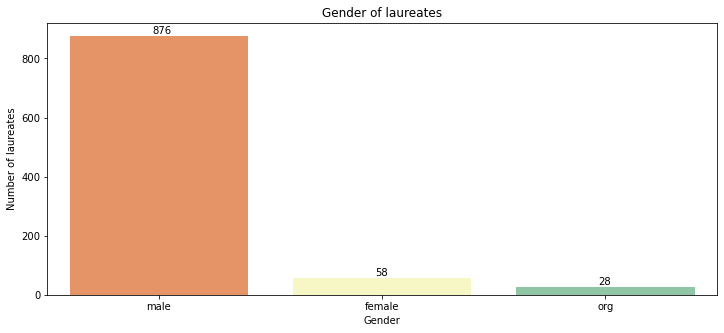

In [18]:
nobel_gender = nobel_data['gender'].value_counts().to_frame()

plt.figure(figsize=(12,5))
ax = sns.barplot(x = nobel_gender.index, y='gender', data=nobel_gender, palette='Spectral')
plt.xlabel('Gender')
plt.ylabel('Number of laureates')
plt.title('Gender of laureates')

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.37, p.get_height()+7))

plt.show()

Let's build a simple cross tabulation that shows the different categories of Nobel prizes won by women.

In [19]:
female_nobel = nobel_data.loc[nobel_data["female_laureate"] == True]
pd.crosstab(female_nobel["gender"], female_nobel["category"])

category,chemistry,economics,literature,medicine,peace,physics
gender,,,,,,
female,7,2,16,12,17,4


Let's vizualise how the Nobel prizes won by women are divided between different prize categories.

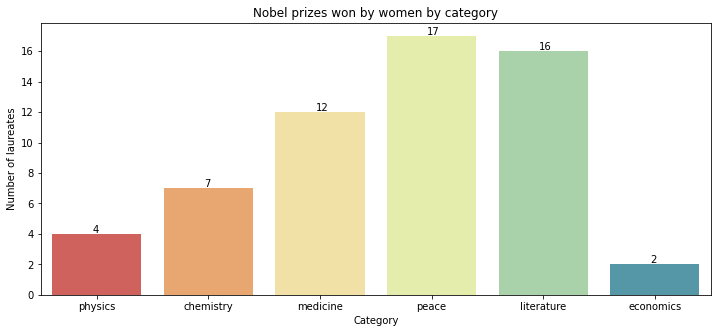

In [20]:
plt.figure(figsize=(12,5))
ax = sns.countplot(data=female_nobel, x='category', palette='Spectral')
plt.xlabel('Category')
plt.ylabel('Number of laureates')
plt.title('Nobel prizes won by women by category')

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.36, p.get_height()+0.1))

plt.show()

Data shows that the Nobel prizes most awarded to women are the peace prize and the literature prize. How many Nobel prizes have women received in science fields (chemistry, medicine, and physics) and how does it compare to the totals?

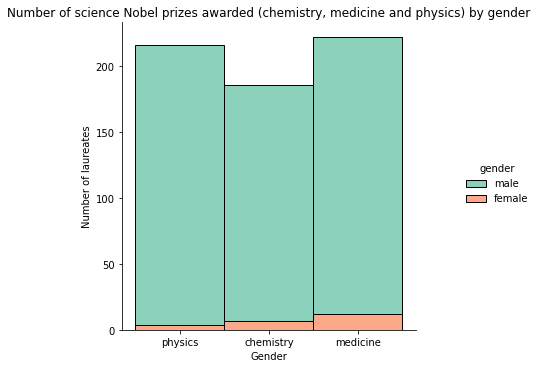

In [21]:
science_nobel = nobel_data.loc[(nobel_data["category"] == "chemistry") | (nobel_data["category"] == "medicine") | (nobel_data["category"] == "physics")]

sns.displot(data=science_nobel, x="category", hue="gender", multiple="stack", palette='Set2')
plt.title("Number of science Nobel prizes awarded (chemistry, medicine and physics) by gender")
plt.xlabel("Gender")
plt.ylabel("Number of laureates")
plt.show()

It is not unexpected that in the sciences there are far more male than female Nobel laureates, because in the past the academia was a male-dominated field. However, the ratio of women in scientific professions has increased in all fields of science over the last decades. Does the Nobel prize reflect that change?

Let's look at the number of women awarded the Nobel prize in the sciences per decade.

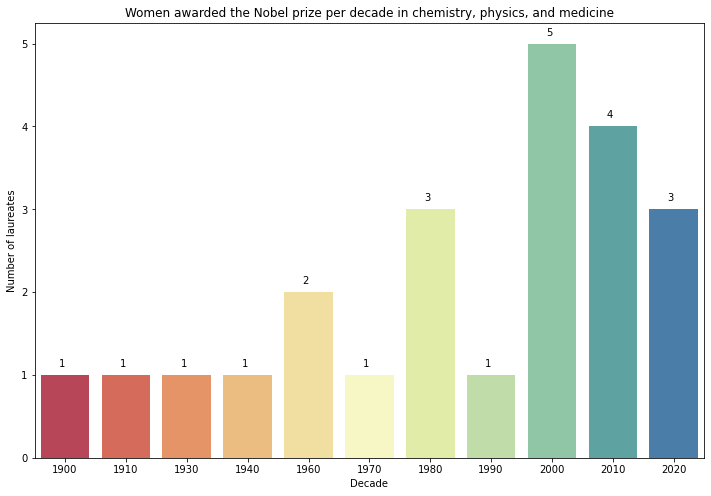

In [22]:
female_science_nobel = science_nobel[science_nobel["gender"] == "female"]

plt.figure(figsize=(12,8))
ax = sns.countplot(data=female_science_nobel, x="decade", palette="Spectral")
plt.title("Women awarded the Nobel prize per decade in chemistry, physics, and medicine")
plt.xlabel("Decade")
plt.ylabel("Number of laureates")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.1))

plt.show()

Clearly, there has not been much imporovement in the science categories.

Let's look at the number of women awarded the Nobel prize in all categories per decade. Have women fared better there?

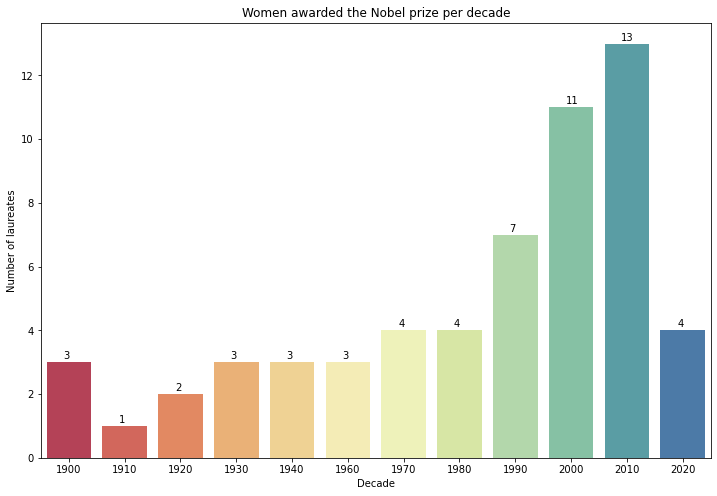

In [23]:
plt.figure(figsize=(12,8))
ax = sns.countplot(data=female_nobel, x="decade", palette="Spectral")
plt.title("Women awarded the Nobel prize per decade")
plt.xlabel("Decade")
plt.ylabel("Number of laureates")

for p in ax.patches:
    ax.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+0.1))

plt.show()

Let's also calculate the proportion of female Nobel prize winners per decade. But this time let's leave out the 2020 decade, because it is not a completed decade.

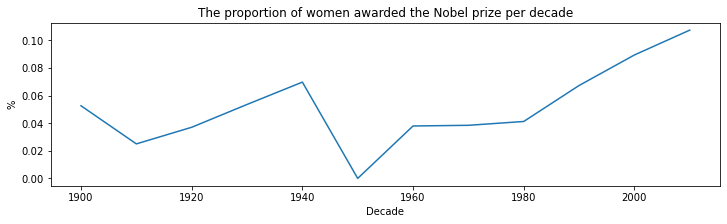

In [24]:
new_df = nobel_data[nobel_data["decade"] < 2020]
prop_female_laureates = new_df.groupby("decade", as_index=False)["female_laureate"].mean()

plt.figure(figsize=(12,3))
sns.lineplot(data=prop_female_laureates, x="decade", y="female_laureate", palette="Spectral")
plt.title("The proportion of women awarded the Nobel prize per decade")
plt.xlabel("Decade")
plt.ylabel("%")
plt.show()

The overall numbers have definitely improved in recent decades, but the improvement is so small that it is difficult to say whether this is a sign of progress or whether it has happened merely by chance.

Let's take a look at the last 5 years.

In [25]:
last_five = nobel_data.loc[nobel_data["year"] > 2015]
pd.crosstab(last_five["gender"], last_five["year"])

year,2016,2017,2018,2019,2020
gender,,,,,
female,0,0,4,1,4
male,11,11,9,13,7
org,0,1,0,0,1


Now let's vizualize the data.

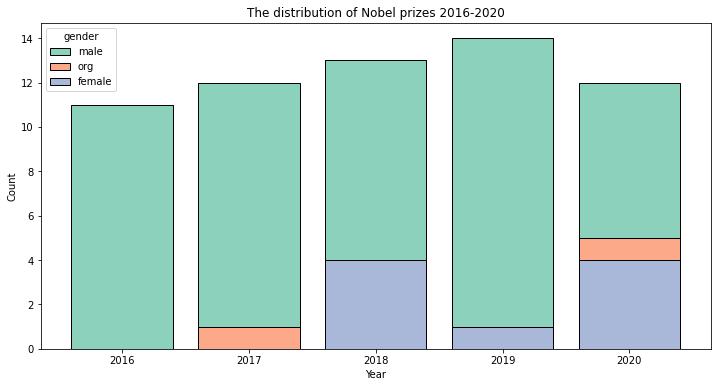

In [26]:
plt.figure(figsize=(12,6))
last_five["year"] = last_five["year"].astype(str)
sns.histplot(data=last_five, x="year", hue="gender", multiple="stack", shrink=.8, palette='Set2')
plt.title("The distribution of Nobel prizes 2016-2020")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

All things considered, the ratio of women Nobel laureates is still low and gives the impression of a bias towards men. A significant gender gap still remains.

## Age

When we looked at the gender of the laureates over the last five years, there was a year that stood out: 2016. What happened in 2016?

In [27]:
nobel2016 = nobel_data.loc[nobel_data["year"] == 2016]
nobel2016[['firstname','surname','gender', 'born','category']]

,firstname,surname,gender,born,category
900,Yoshinori,Ohsumi,male,1945-02-09,medicine
901,David J.,Thouless,male,1934-09-21,physics
902,F. Duncan M.,Haldane,male,1951-09-14,physics
903,J. Michael,Kosterlitz,male,1943-06-22,physics
904,Jean-Pierre,Sauvage,male,1944-10-21,chemistry
905,Sir J. Fraser,Stoddart,male,1942-05-24,chemistry
906,Bernard L.,Feringa,male,1951-05-18,chemistry
907,Juan Manuel,Santos,male,1951-08-10,peace
908,Oliver,Hart,male,1948-10-09,economics
909,Bengt,Holmström,male,1949-04-18,economics


All the laureates were men, but also: at least 65 years old and mostly over 70. Has this always been the case? Using our dataset, let's see what is the age at the time of recognition trend among Nobel prize laureates.

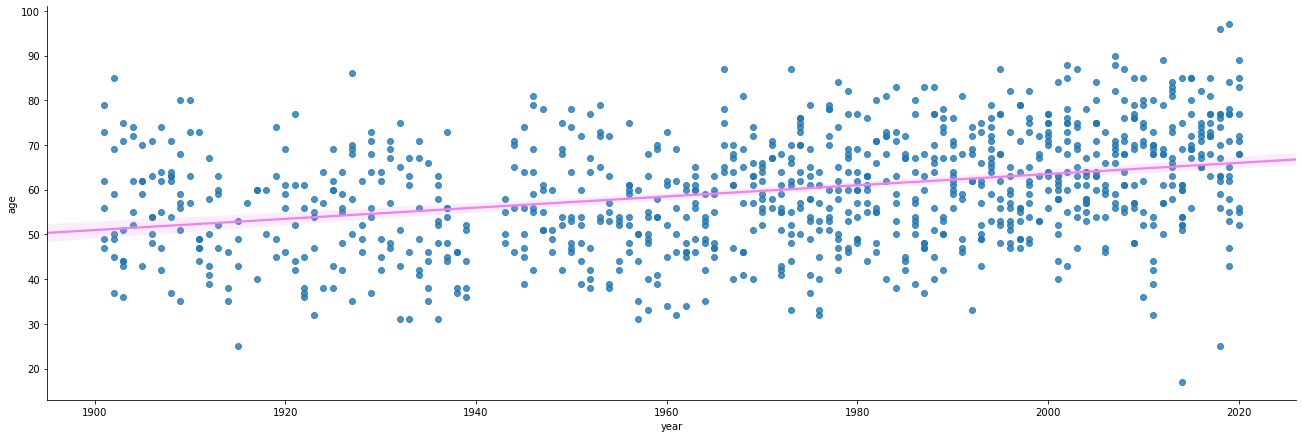

In [28]:
# Selecting a subset that does not include organisations
nobel_data_subset = nobel_data.loc[nobel_data["gender"] != "org"]

# We will only use the birth year
nobel_data_subset["born"] = nobel_data_subset["born"].str[0:4]
nobel_data_subset["born"] = pd.to_numeric(nobel_data_subset["born"])

# Getting the age of the laureates
nobel_data_subset["age"] = nobel_data_subset["year"] - nobel_data_subset["born"]

# Plotting a simple linear relationship between the two variables year and age
sns.lmplot(x="year", y="age", data=nobel_data_subset, height=6, aspect=3, truncate=False, line_kws={'color':'violet'})

plt.show()

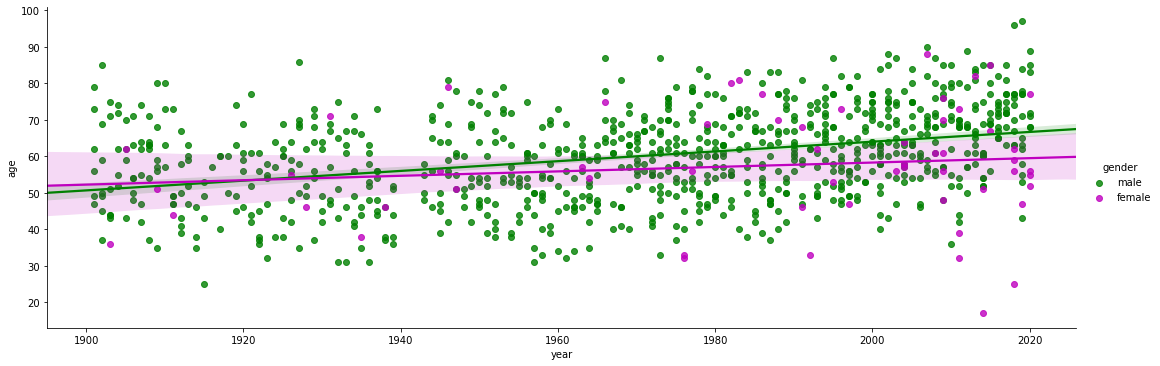

In [29]:
# Conditioning on a third variable and plotting the levels in different colors
sns.lmplot(x="year", y="age", hue="gender", data=nobel_data_subset, aspect=3, truncate=False, palette=dict(male="g", female="m"))

plt.show()

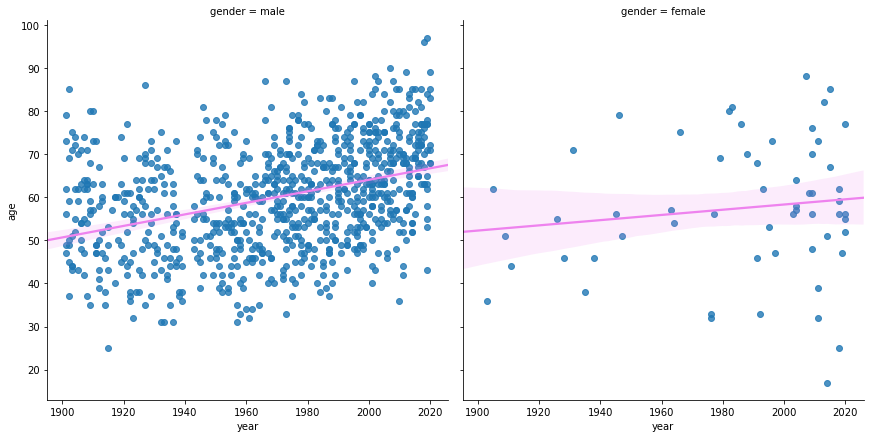

In [30]:
# Plotting seperately across genders
sns.lmplot(x="year", y="age", col="gender", data=nobel_data_subset, truncate=False, height=6, aspect=1, line_kws={'color':'violet'})

plt.show()

These visualizations show that there has been a significant trend of Nobel laureates winning prizes later in life.

Let's look at the average age of laureates at the moment of recognition.

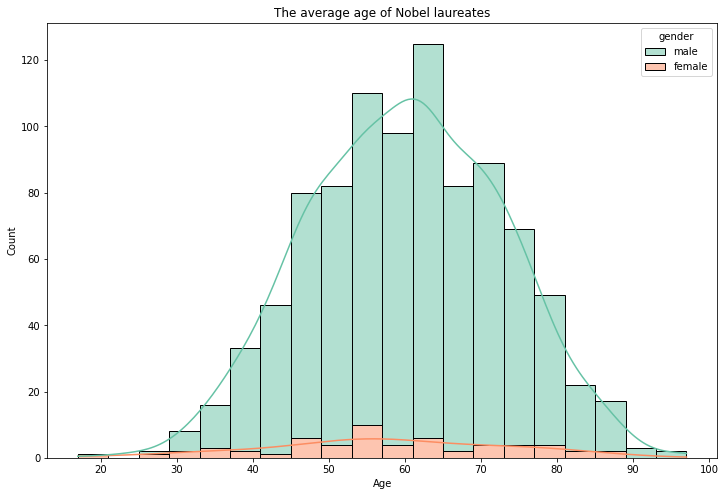

In [31]:
plt.figure(figsize=(12,8))
sns.histplot(data=nobel_data_subset, x="age", hue="gender", multiple="stack", binwidth=4, bins=20, kde=True, palette='Set2')
plt.title("The average age of Nobel laureates")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

Data shows that the year 2016, when all the laureates were 65 or older, was in no terms an unusual year. Nobel recognition (when it comes) comes later in life and to those likely at the end of their professional careers. This also coincides with the tendency of the academy to award prizes for work done over a lifetime. It is important to note here that Nobel prizes cannot be awarded posthumously.


## Countries and continents

The Nobel prize has also faced a lot of criticism because of its western bias, with the United States and western Europe accounting for a huge amount of the total number of laureates. Let's look at the data and see what it tells us.

In [32]:
print("The number of countries with Nobel laureates:", nobel_data["bornCountryCode"].value_counts().shape[0])

The number of countries with Nobel laureates: 79


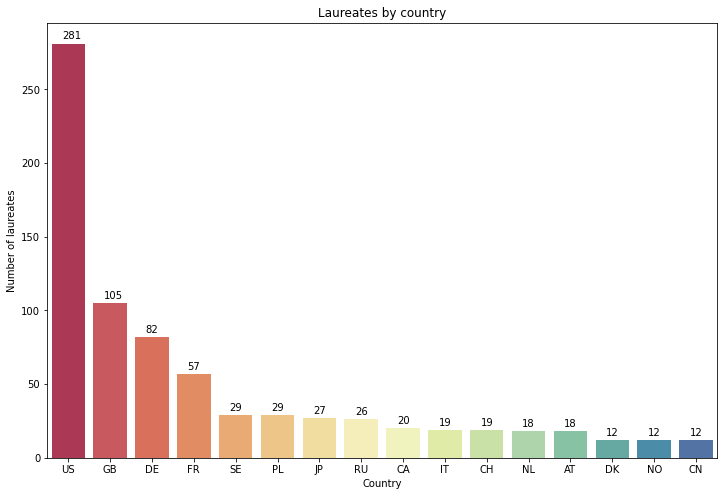

In [33]:
# Selecting a subset that contains only the column 'bornCountryCode'
nobel_data_countries = nobel_data["bornCountryCode"].value_counts().to_frame()

# For a better barplot lets include only the rows where the value is higher than 10
nobel_data_countries = nobel_data_countries[nobel_data_countries["bornCountryCode"] > 10]

# Plotting the barplot
plt.figure(figsize=(12,8))
ax = sns.barplot(x = nobel_data_countries.index, y="bornCountryCode", data=nobel_data_countries, palette="Spectral")
plt.xlabel("Country")
plt.ylabel("Number of laureates")
plt.title("Laureates by country")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+3))

plt.show()

We can clearly see that North America and Western Europe have received the most Nobel prizes. The awards have been given to people and organisations from 79 different countries in total — but quite a sizeable portion of them have gone to only 4 countries, the United States, Great Britain, Germany, and France.

This means that when we look at which part of the world the laureates are from, things will not look much different.

In [34]:
# We will look only at individuals, since organisations do not have a country associated with them
new_nobel_data = nobel_data.loc[nobel_data["gender"] != "org"]

# Read in the dataset with country codes and continents
continents = pd.read_csv('data/continent.csv')

# Combine the two datasets to add the column continent
new_nobel_data = new_nobel_data.merge(continents, how="inner", on="bornCountryCode")

Let's build a simple cross tabulation that shows the different categories of Nobel prizes and the winners by continent.

In [35]:
pd.crosstab(new_nobel_data["continent"], new_nobel_data["category"])

category,chemistry,economics,literature,medicine,peace,physics
continent,,,,,,
Africa,3,0,7,3,13,2
Asia,16,3,10,10,15,20
Australia/Oceania,3,0,0,8,0,2
Europe,104,30,80,115,53,116
North America,59,53,15,82,22,76
South America,1,0,5,4,4,0


And another cross tabulation that shows decades and Nobel prize laureates by continent.


In [36]:
pd.crosstab(new_nobel_data["continent"], new_nobel_data["decade"])

decade,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
continent,,,,,,,,,,,,,
Africa,0,0,0,0,0,2,2,2,4,6,6,6,0
Asia,2,1,1,1,1,3,5,4,6,8,19,23,0
Australia/Oceania,1,1,0,0,1,0,4,1,0,1,4,0,0
Europe,52,33,48,39,22,44,39,60,44,34,37,42,4
North America,1,3,5,14,14,22,24,35,35,50,53,44,7
South America,0,0,0,1,2,0,1,1,5,2,0,2,0


Let's visualize this data.

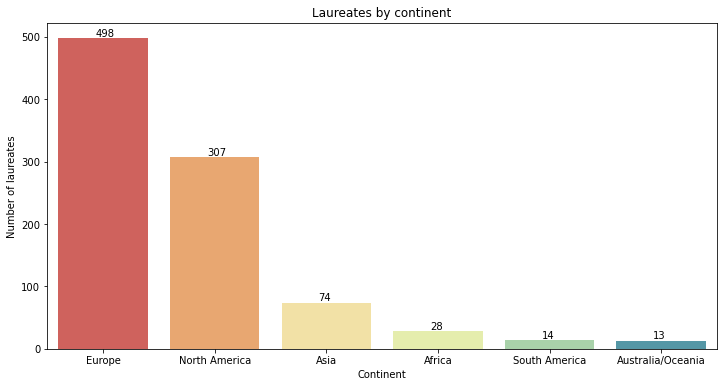

In [37]:
# Selecting a subset that contains only the column continent
nobel_data_continents = new_nobel_data["continent"].value_counts().to_frame()

# Plotting the barplot
plt.figure(figsize=(12,6))
ax = sns.barplot(x = nobel_data_continents.index, y="continent", data=nobel_data_continents, palette="Spectral")
plt.xlabel("Continent")
plt.ylabel("Number of laureates")
plt.title("Laureates by continent")

for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.33, p.get_height()+3))

plt.show()

We can clearly see that outside of Europe and North America there are not that many Nobel prizes to go around. Asia, the most populous region in the world, has only claimed 74 Nobel prizes. And a lot of Asia's prizes have gone to one country - Japan, with 27 laureates. Africa has only 28 Nobel laureates.

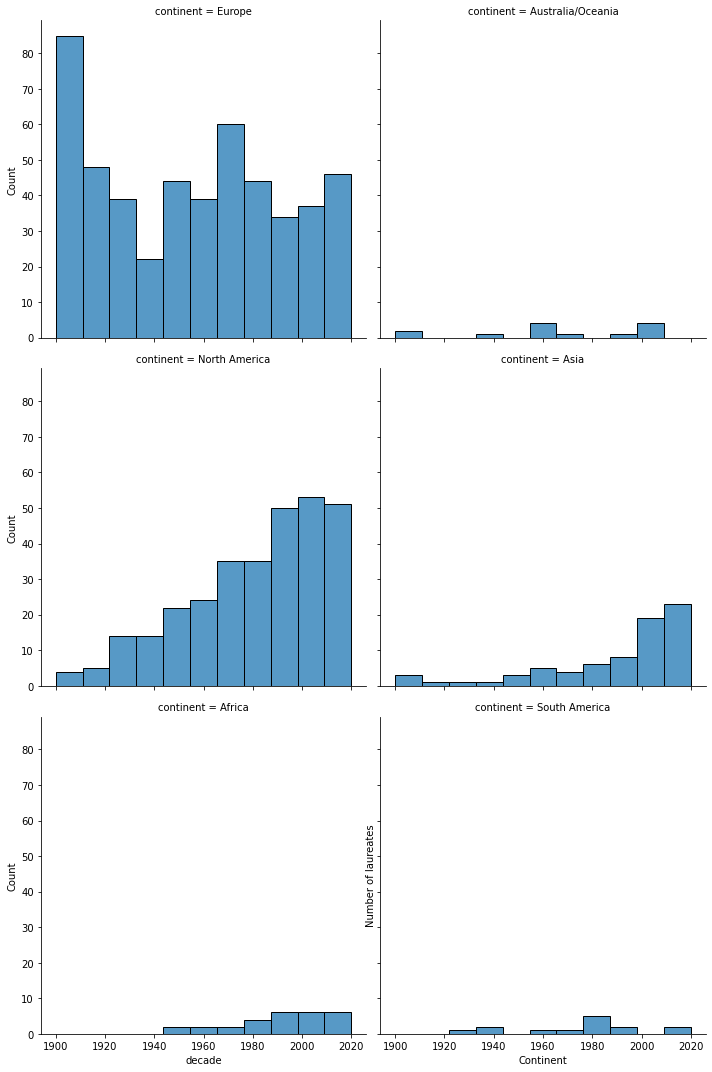

In [38]:
ax = sns.displot(data=new_nobel_data, x="decade", col="continent", col_wrap=2, palette='Set2')
plt.xlabel("Continent")
plt.ylabel("Number of laureates")
plt.show()

The Nobel Committee, which is responsible for selecting and nominating the potential laureates, has changed its nomination processes to encourage geographic diversity among prize nominees and, with that, among the eventual winners. However, data shows only minor improvement, if any, so at the moment the effects of these efforts are not yet evident.

## Conclusion

The Nobel prize dataset is an intriguing dataset to explore, because you can really see how much time and effort is needed to eliminate biases, especially in the sciences, and how difficult it is to create meaningful change.

In our analysis we looked for meaningful changes in the gender, age, and country distribution of Nobel prize laureates, and apart from a slow upward trend in the age of the laureates, did not really find any. For the time being, Nobel laureates are still overwhelmingly male. On average, they are getting older. And most of them are from the US or Europe.

This matters, because the Nobel prizes have the kind of prestige and power that can have an impact on the future. In the sciences, for example, it gets you publicity, funding, and more projects. Nobel laureates become role models. This is why it is not a small matter that the prizes are stuck in the past, in a weird circle of men awarding men, who employ men, who then have the resources to do important work and receive awards.

However, it is also essential to note that these are problems the Nobel prize alone cannot overcome. And while the Nobel prize is not perfect, it is important to have something that recognizes and celebrates the everlasting human enterprise of discovery and knowledge.